# Predict People with multivariances

In [60]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 6]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################
plt.rcParams.update({'axes.grid'     : True})

## Import data

In [61]:
import pandas as pd

path = '../data/num_file/hrs_1_old/p040.csv'
people = pd.read_csv(path, encoding='utf-8')

Merge "date" and "hour" columns to be datetime

In [62]:
people['datetime'] = pd.to_datetime(people['date'])+pd.to_timedelta(people['hour'], unit='h')
people = people.drop(['date', 'hour'], axis=1)
people.set_index('datetime', inplace=True)
people.columns = ['amount']
people['amount'] = people['amount'].astype(float)
print(people)

                      amount
datetime                    
2022-04-21 01:00:00   1033.0
2022-04-21 02:00:00     65.0
2022-04-21 12:00:00   1604.0
2022-04-25 15:00:00   4458.0
2022-04-25 16:00:00  18501.0
...                      ...
2022-09-03 07:00:00   9741.0
2022-09-03 08:00:00  19613.0
2022-09-03 09:00:00  22055.0
2022-09-03 10:00:00  14644.0
2022-09-03 11:00:00  12751.0

[3144 rows x 1 columns]


Resample the data that are not existed

In [63]:
full_index = pd.date_range(start=people.index.min(), end=people.index.max(), freq='h')
people = people.reindex(full_index)
people['amount'] = people['amount'].bfill()
print(people)

                      amount
2022-04-21 01:00:00   1033.0
2022-04-21 02:00:00     65.0
2022-04-21 03:00:00   1604.0
2022-04-21 04:00:00   1604.0
2022-04-21 05:00:00   1604.0
...                      ...
2022-09-03 07:00:00   9741.0
2022-09-03 08:00:00  19613.0
2022-09-03 09:00:00  22055.0
2022-09-03 10:00:00  14644.0
2022-09-03 11:00:00  12751.0

[3251 rows x 1 columns]


In [64]:
import calendar
from datetime import date
day = pd.DataFrame(people.index)
day = day.rename(columns={0: 'datetime'})
day['datetime'] = pd.to_datetime(day['datetime'])
print(day)

                datetime
0    2022-04-21 01:00:00
1    2022-04-21 02:00:00
2    2022-04-21 03:00:00
3    2022-04-21 04:00:00
4    2022-04-21 05:00:00
...                  ...
3246 2022-09-03 07:00:00
3247 2022-09-03 08:00:00
3248 2022-09-03 09:00:00
3249 2022-09-03 10:00:00
3250 2022-09-03 11:00:00

[3251 rows x 1 columns]


Import temperature data.

In [65]:
import os
import pandas as pd

folder_path = '../data/temperature_file/'

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

temperature = []

for file in csv_files:
    file_path = folder_path + file
    df = pd.read_csv(file_path, encoding='utf-8')
    temperature.append(df)

temperature = pd.concat(temperature, ignore_index=True)
    

In [66]:
temperature['datetime'] = pd.to_datetime(temperature['datetime'])
temperature.set_index('datetime', inplace=True)
print(temperature)

                     temperature  precipitation  weather
datetime                                                
2022-01-01 01:00:00         -3.6            0.5      NaN
2022-01-01 02:00:00         -3.6            0.0      NaN
2022-01-01 03:00:00         -3.4            0.0     12.0
2022-01-01 04:00:00         -3.7            0.0      NaN
2022-01-01 05:00:00         -4.1            1.0      NaN
...                          ...            ...      ...
2022-12-31 20:00:00          2.9            0.0      NaN
2022-12-31 21:00:00          1.8            0.0      1.0
2022-12-31 22:00:00          2.6            0.0      NaN
2022-12-31 23:00:00          1.9            0.0      NaN
2023-01-01 00:00:00          1.7            0.0      NaN

[8760 rows x 3 columns]


Merge the amount of people and temperature data as one dataframe.

In [67]:
data = pd.merge(people, temperature, left_index=True, right_index=True, how='inner')
print(data)

                      amount  temperature  precipitation  weather
2022-04-21 01:00:00   1033.0          9.2            0.0      NaN
2022-04-21 02:00:00     65.0          9.1            0.0      NaN
2022-04-21 03:00:00   1604.0          9.1            0.0      1.0
2022-04-21 04:00:00   1604.0          7.9            0.0      NaN
2022-04-21 05:00:00   1604.0          7.4            0.0      NaN
...                      ...          ...            ...      ...
2022-09-03 07:00:00   9741.0         22.4            0.0      NaN
2022-09-03 08:00:00  19613.0         22.8            0.0      NaN
2022-09-03 09:00:00  22055.0         23.2            0.0      4.0
2022-09-03 10:00:00  14644.0         23.4            0.0      NaN
2022-09-03 11:00:00  12751.0         23.7            0.0      NaN

[3251 rows x 4 columns]


## Data Preprocessing

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
data[['amount', 'temperature']] = scaler.fit_transform(data[['amount', 'temperature']])

In [70]:
print(data.head())

                       amount  temperature  precipitation  weather
2022-04-21 01:00:00 -1.608170    -2.122485            0.0      NaN
2022-04-21 02:00:00 -1.752224    -2.140183            0.0      NaN
2022-04-21 03:00:00 -1.523196    -2.140183            0.0      1.0
2022-04-21 04:00:00 -1.523196    -2.352552            0.0      NaN
2022-04-21 05:00:00 -1.523196    -2.441039            0.0      NaN


In [71]:
data = data[['amount', 'temperature']]
print(data)

                       amount  temperature
2022-04-21 01:00:00 -1.608170    -2.122485
2022-04-21 02:00:00 -1.752224    -2.140183
2022-04-21 03:00:00 -1.523196    -2.140183
2022-04-21 04:00:00 -1.523196    -2.352552
2022-04-21 05:00:00 -1.523196    -2.441039
...                       ...          ...
2022-09-03 07:00:00 -0.312280     0.213572
2022-09-03 08:00:00  1.156832     0.284362
2022-09-03 09:00:00  1.520241     0.355151
2022-09-03 10:00:00  0.417365     0.390546
2022-09-03 11:00:00  0.135656     0.443638

[3251 rows x 2 columns]


Slice into dataframe

In [72]:
window_size = 24
def one_step_forecast(df, window=6):
    d = df.values
    x = []
    n = len(df)
    idx = df.index[:-window]
    for start in range(n-window):
        end = start + window
        x.append(d[start:end])
    cols = [f'x_{i}' for i in range(1, window+1)]
    x = np.array(x).reshape(n-window, -1)
    y = df.iloc[window:].values
    df_xs = pd.DataFrame(x, columns=cols, index=idx)
    df_y = pd.DataFrame(y.reshape(-1), columns=['y'], index=idx)
    return pd.concat([df_xs, df_y], axis=1).dropna()

In [73]:
test = one_step_forecast(data['amount'], window_size)

In [74]:
y = test['y']
test = test.drop('y', axis=1)
print(test)

                          x_1       x_2       x_3       x_4       x_5  \
2022-04-21 01:00:00 -1.608170 -1.752224 -1.523196 -1.523196 -1.523196   
2022-04-21 02:00:00 -1.752224 -1.523196 -1.523196 -1.523196 -1.523196   
2022-04-21 03:00:00 -1.523196 -1.523196 -1.523196 -1.523196 -1.523196   
2022-04-21 04:00:00 -1.523196 -1.523196 -1.523196 -1.523196 -1.523196   
2022-04-21 05:00:00 -1.523196 -1.523196 -1.523196 -1.523196 -1.523196   
...                       ...       ...       ...       ...       ...   
2022-09-02 07:00:00  0.285961  1.057721  0.334623  1.582000  2.100772   
2022-09-02 08:00:00  1.057721  0.334623  1.582000  2.100772  0.787768   
2022-09-02 09:00:00  0.334623  1.582000  2.100772  0.787768  1.724863   
2022-09-02 10:00:00  1.582000  2.100772  0.787768  1.724863  1.419492   
2022-09-02 11:00:00  2.100772  0.787768  1.724863  1.419492  0.644905   

                          x_6       x_7       x_8       x_9      x_10  ...  \
2022-04-21 01:00:00 -1.523196 -1.523196 -1.52

In [75]:
test_2 = one_step_forecast(data['temperature'], window_size)

In [76]:
test_2.drop('y', axis=1, inplace=True)
print(test_2)

                          x_1       x_2       x_3       x_4       x_5  \
2022-04-21 01:00:00 -2.122485 -2.140183 -2.140183 -2.352552 -2.441039   
2022-04-21 02:00:00 -2.140183 -2.140183 -2.352552 -2.441039 -2.246367   
2022-04-21 03:00:00 -2.140183 -2.352552 -2.441039 -2.246367 -1.821630   
2022-04-21 04:00:00 -2.352552 -2.441039 -2.246367 -1.821630 -1.308405   
2022-04-21 05:00:00 -2.441039 -2.246367 -1.821630 -1.308405 -0.972154   
...                       ...       ...       ...       ...       ...   
2022-09-02 07:00:00  0.425941  0.585217  0.850678  1.063047  0.903771   
2022-09-02 08:00:00  0.585217  0.850678  1.063047  0.903771  1.063047   
2022-09-02 09:00:00  0.850678  1.063047  0.903771  1.063047  0.956863   
2022-09-02 10:00:00  1.063047  0.903771  1.063047  0.956863  1.027652   
2022-09-02 11:00:00  0.903771  1.063047  0.956863  1.027652  0.939165   

                          x_6       x_7       x_8       x_9      x_10  ...  \
2022-04-21 01:00:00 -2.246367 -1.821630 -1.30

In [77]:
print(y)

2022-04-21 01:00:00   -1.098475
2022-04-21 02:00:00   -1.098475
2022-04-21 03:00:00   -1.098475
2022-04-21 04:00:00   -1.098475
2022-04-21 05:00:00   -1.098475
                         ...   
2022-09-02 07:00:00   -0.312280
2022-09-02 08:00:00    1.156832
2022-09-02 09:00:00    1.520241
2022-09-02 10:00:00    0.417365
2022-09-02 11:00:00    0.135656
Name: y, Length: 3227, dtype: float64


In [78]:
day = np.array(y.index.dayofweek)

In [79]:
one_hot = pd.get_dummies(day)

In [80]:
print(one_hot)

          0      1      2      3      4      5      6
0     False  False  False   True  False  False  False
1     False  False  False   True  False  False  False
2     False  False  False   True  False  False  False
3     False  False  False   True  False  False  False
4     False  False  False   True  False  False  False
...     ...    ...    ...    ...    ...    ...    ...
3222  False  False  False  False   True  False  False
3223  False  False  False  False   True  False  False
3224  False  False  False  False   True  False  False
3225  False  False  False  False   True  False  False
3226  False  False  False  False   True  False  False

[3227 rows x 7 columns]


Divide to train and test and val

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
train_people, test_people, train_temperature, test_temperature, train_y, test_y = train_test_split(test, test_2, y, test_size=0.15, shuffle=False)
train_people, val_people, train_temperature, val_temperature, train_y, val_y = train_test_split(train_people, train_temperature, train_y, test_size=0.15, shuffle=False)
index = test_y.index
train_people = np.expand_dims(train_people, axis=-1)
val_people = np.expand_dims(val_people, axis=-1)
test_people = np.expand_dims(test_people, axis=-1)
train_temperature = np.expand_dims(train_temperature, axis=-1)
val_temperature = np.expand_dims(val_temperature, axis=-1)
test_temperature = np.expand_dims(test_temperature, axis=-1)
y_train = np.expand_dims(train_y, axis=-1)
y_val = np.expand_dims(val_y, axis=-1)
y_test = np.expand_dims(test_y, axis=-1)

In [83]:
print(y_train.shape)

(2330, 1)


In [84]:
print(y_test.shape)

(485, 1)


In [85]:
print(one_hot[:2340])

          0      1      2      3      4      5      6
0     False  False  False   True  False  False  False
1     False  False  False   True  False  False  False
2     False  False  False   True  False  False  False
3     False  False  False   True  False  False  False
4     False  False  False   True  False  False  False
...     ...    ...    ...    ...    ...    ...    ...
2335  False  False   True  False  False  False  False
2336  False  False   True  False  False  False  False
2337  False  False   True  False  False  False  False
2338  False  False   True  False  False  False  False
2339  False  False   True  False  False  False  False

[2340 rows x 7 columns]


In [86]:
print(y_val.shape)

(412, 1)


## Create model

In [87]:
from keras.models import Model
from keras import layers
from keras import Input
from keras.metrics import RootMeanSquaredError as RMSE, MeanAbsoluteError as MAE
from keras import callbacks

In [88]:
people_input = Input(shape=(train_people.shape[1], train_people.shape[2]), name='people')
temperature_input = Input(shape=(train_temperature.shape[1], train_temperature.shape[2]), name='temperature')
day_input = Input(shape=(one_hot.shape[1],), name='day')

In [89]:
print(people_input.shape)

(None, 24, 1)


In [90]:
units = 32
people_lstm = layers.LSTM(units, name='people_lstm')(people_input)
temperature_lstm = layers.LSTM(units, name='temperature_lstm')(temperature_input)
day_dense = layers.Dense(7, activation='sigmoid', name='day_dense')(day_input)

In [91]:
concat= layers.concatenate([people_lstm, temperature_lstm, day_dense], name='concat')
# lstm_dense = layers.Dense(71, activation='relu', name='lstm_dense')(concat)
# concat_dense = layers.concatenate([lstm_dense, day_dense], name='concat_dense')
output = layers.Dense(1, name='output')(concat)

In [92]:
model = Model([people_input, temperature_input, day_input], output)

In [93]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 people (InputLayer)            [(None, 24, 1)]      0           []                               
                                                                                                  
 temperature (InputLayer)       [(None, 24, 1)]      0           []                               
                                                                                                  
 day (InputLayer)               [(None, 7)]          0           []                               
                                                                                                  
 people_lstm (LSTM)             (None, 32)           4352        ['people[0][0]']                 
                                                                                            

In [94]:
print(train_people.shape)

(2330, 24, 1)


In [95]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RMSE(), MAE()])
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit([train_people, train_temperature, one_hot[:len(train_people)]], y_train, epochs=200, batch_size=32, shuffle=False, validation_data=([val_people, val_temperature, one_hot[len(train_people):len(train_people)+len(val_people)]], y_val), callbacks=[es])

Epoch 1/200


73/73 [==============================] - 2s 10ms/step - loss: 0.8661 - root_mean_squared_error: 0.9307 - mean_absolute_error: 0.7619 - val_loss: 0.2686 - val_root_mean_squared_error: 0.5183 - val_mean_absolute_error: 0.3861
Epoch 2/200
73/73 [==============================] - 0s 5ms/step - loss: 0.2595 - root_mean_squared_error: 0.5094 - mean_absolute_error: 0.3712 - val_loss: 0.1100 - val_root_mean_squared_error: 0.3316 - val_mean_absolute_error: 0.2585
Epoch 3/200
73/73 [==============================] - 0s 5ms/step - loss: 0.1425 - root_mean_squared_error: 0.3775 - mean_absolute_error: 0.2856 - val_loss: 0.0967 - val_root_mean_squared_error: 0.3110 - val_mean_absolute_error: 0.2412
Epoch 4/200
73/73 [==============================] - 0s 5ms/step - loss: 0.1132 - root_mean_squared_error: 0.3364 - mean_absolute_error: 0.2514 - val_loss: 0.0890 - val_root_mean_squared_error: 0.2983 - val_mean_absolute_error: 0.2312
Epoch 5/200
73/73 [==============================] - 0s 4ms/step - loss

In [96]:
eval_result = model.evaluate([test_people, test_temperature, one_hot[-len(test_people):]], y_test)
print(eval_result)

16/16 [==============================] - 0s 2ms/step - loss: 0.0719 - root_mean_squared_error: 0.2681 - mean_absolute_error: 0.1934
[0.0719025582075119, 0.2681465148925781, 0.1934233456850052]


In [97]:
model.save(f'model_{window_size}.keras')

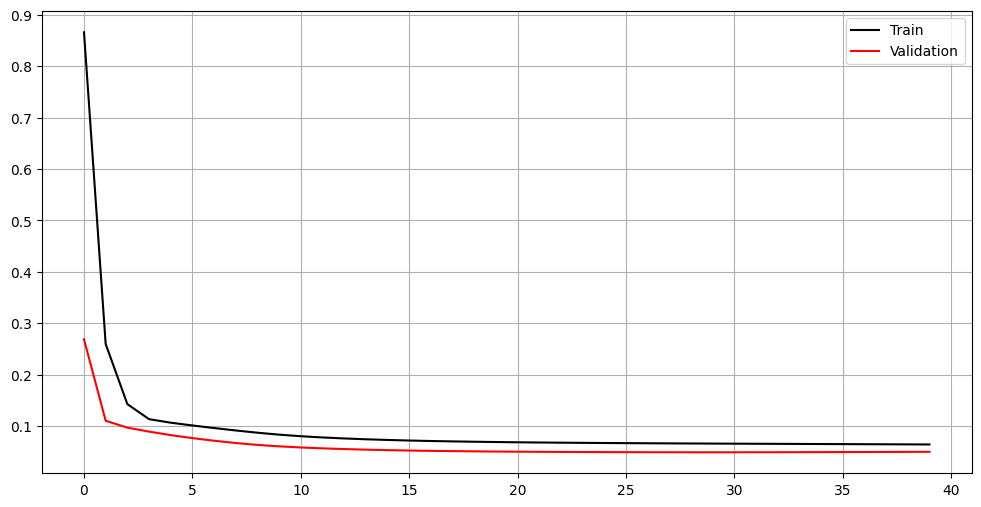

In [98]:
pd.Series(history.history['loss']).plot(style='k')
pd.Series(history.history['val_loss']).plot(style='r')
plt.legend(['Train', 'Validation'])

In [99]:
result = model.predict([test_people, test_temperature, one_hot[-len(test_people):]])[-1]

16/16 [==============================] - 0s 1ms/step


In [100]:
print(result)

[0.870216]


In [101]:
result = [result[-1], result[-1]]

In [102]:
result = np.array(result)

In [103]:
result = scaler.inverse_transform(result.reshape(1, -1))

In [104]:
print(result[0][0])

17687.025


In [105]:
res = np.array([test_y.iloc[-1], test_y.iloc[-1]])
res = scaler.inverse_transform(res.reshape(1, -1))
print(res[0][0])

12751.0


In [106]:
result = model.predict([test_people, test_temperature, one_hot[-len(test_people):]])

16/16 [==============================] - 0s 1ms/step


In [107]:
def plot_forecast(test_y, result, index=index):
    plt.plot(index, test_y, label='actual')
    plt.plot(index, result, label='forecast')
    plt.legend()
    plt.show()

In [108]:
test_y_ex = np.array([test_y, test_y])

In [109]:
test_y_ex = np.array(test_y_ex.T)

In [110]:
print(test_y_ex.shape)

(485, 2)


In [111]:
test_y = scaler.inverse_transform(test_y_ex)

In [112]:
print(test_y[:, 0])

[ 3910.  4031.  5807.  7202.  9444. 12798. 13134. 14116. 12800. 11388.
 12411. 12229.  7530.  5348.  6680.  6431.  4717.  4047.  4305.  3997.
  3988.  2295.  2416.  3753.  4170.  5492.  6024.  9016. 11629. 14193.
 10913.  8191.  8577.  8610. 10059.  8373.  7772.  6518.  5768.  4958.
  4763.  4491.  4530.  4496.  4118.  2921.  3301.  3335.  4942.  9130.
 10375. 11173. 14430. 16136. 16037. 17111. 16096. 14379. 14793. 14239.
 11939.  9600.  7850.  6463.  5443.  5165.  4924.  4764.  4872.  3292.
  3673.  3958.  5875.  9780. 11876. 12144. 13215. 14322. 18572. 19070.
 18182. 17352. 17554. 16795. 13224. 10401.  7993.  6648.  5902.  5706.
  5297.  5378.  5059.  4250.  4915.  5103.  6708. 12076. 15013. 15057.
 17617. 20683. 23015. 22104. 23203. 23976. 24702. 21751. 22529. 15821.
  9768.  7091.  6484.  7109.  7739.  7487.  7342.  6571.  7518.  7702.
  9944. 13593. 16188. 20538. 22418. 26811. 27704. 23078. 22956. 23848.
 21624. 18722. 16849. 14199. 10909.  8326.  7096.  6627.  6548.  6438.
  6044

In [113]:
result = np.array([result[:, 0], result[:, 0]])

In [114]:
result = result.T
print(result.shape)

(485, 2)


In [115]:
result = scaler.inverse_transform(result)

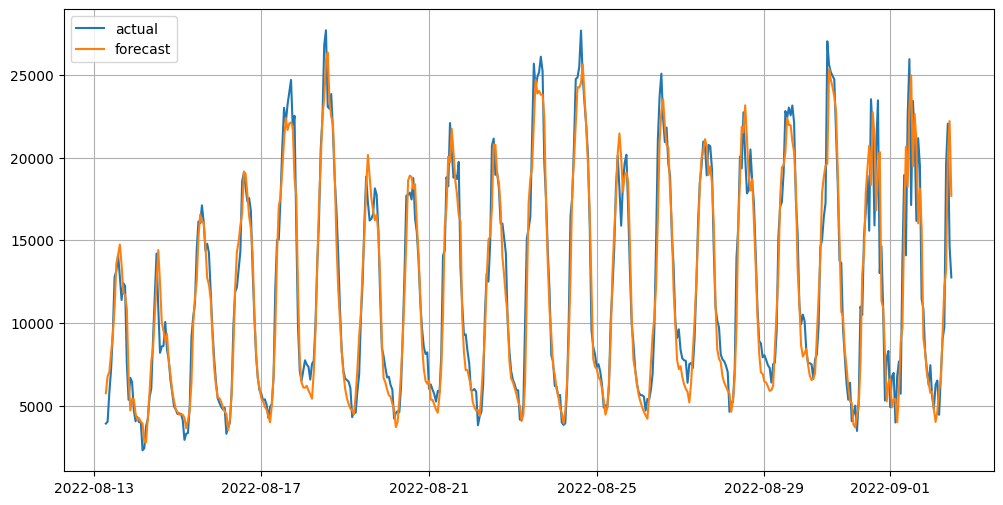

In [116]:
plot_forecast(test_y[:, 0], result[:, 0])

In [117]:
def plot_error(test_y, result):
    error = test_y - result
    plt.plot(index, error, label='error')
    plt.title(f'Error MAE: {np.mean(np.abs(error)):.2f} RMSE: {np.sqrt(np.mean(error**2)):.2f}')
    plt.legend()
    plt.show()

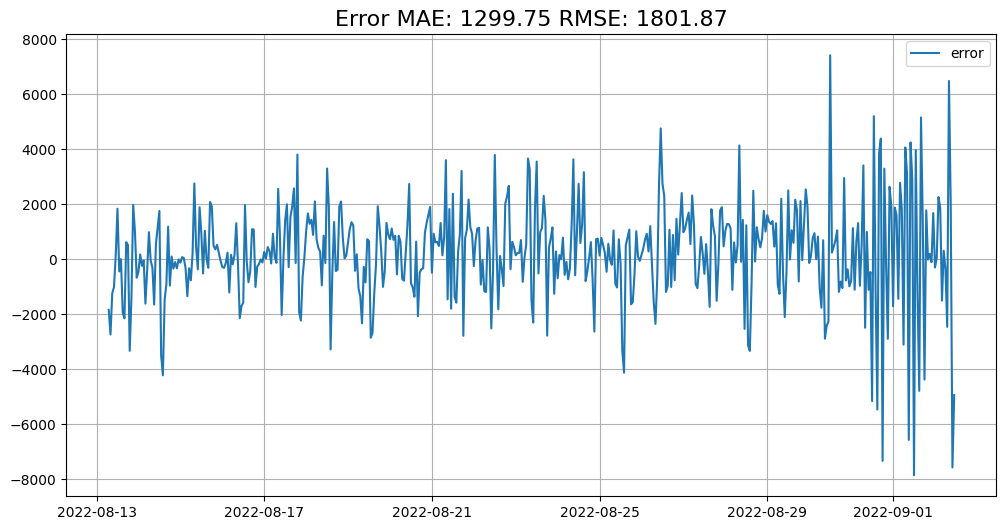

In [118]:
plot_error(test_y[:, 0], result[:, 0])